In [8]:
import ROOT as r
import uproot
import hist
import matplotlib.pyplot as plt
import awkward as ak
import numpy as np
import array as arr
from milliqanProcessor import *
from milliqanScheduler import *
from milliqanCuts import *
from milliqanPlotter import *
import os
from functools import partial

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
def getMaxPulseTime(events):
    t_0 = events.time_module_calibrated[(events.eventCuts) & (events.layer0) & (events.straightPulses)]
    t_1 = events.time_module_calibrated[(events.eventCuts) & (events.layer1) & (events.straightPulses)]
    t_2 = events.time_module_calibrated[(events.eventCuts) & (events.layer2) & (events.straightPulses)]
    t_3 = events.time_module_calibrated[(events.eventCuts) & (events.layer3) & (events.straightPulses)]

    #example of getting max value mask
    events['max_height'] = events.height == ak.max(events.height, axis=1, keepdims=True)

    passingHeights0 = events.height[(events.eventCuts) & (events.layer0) & (events.straightPulses)]
    passingHeights1 = events.height[(events.eventCuts) & (events.layer1) & (events.straightPulses)]
    passingHeights2 = events.height[(events.eventCuts) & (events.layer2) & (events.straightPulses)]
    passingHeights3 = events.height[(events.eventCuts) & (events.layer3) & (events.straightPulses)]

    #print(len(ak.drop_none(ak.flatten(ak.max(passingHeights0, axis=1, keepdims=True)))), len(ak.drop_none(ak.flatten(ak.max(passingHeights1, axis=1, keepdims=True)))), len(ak.drop_none(ak.flatten(ak.max(passingHeights2, axis=1, keepdims=True)))), len(ak.drop_none(ak.flatten(ak.max(passingHeights3, axis=1, keepdims=True)))))

    max_pulse0 = ak.pad_none(passingHeights0, 1, axis=1) == ak.max(passingHeights0, axis=1, keepdims=True, initial=0)
    max_pulse1 = ak.pad_none(passingHeights1, 1, axis=1) == ak.max(passingHeights1, axis=1, keepdims=True, initial=0)
    max_pulse2 = ak.pad_none(passingHeights2, 1, axis=1) == ak.max(passingHeights2, axis=1, keepdims=True, initial=0)
    max_pulse3 = ak.pad_none(passingHeights3, 1, axis=1) == ak.max(passingHeights3, axis=1, keepdims=True, initial=0)

    #print(ak.pad_none(passingHeights0, 1, axis=1))
    #print(ak.max(passingHeights0, axis=1, keepdims=True, initial=0))

    #print(ak.drop_none(max_pulse0, axis=1))

    t_0 = t_0[ak.drop_none(max_pulse0, axis=1)]
    t_1 = t_1[ak.drop_none(max_pulse1, axis=1)]
    t_2 = t_2[ak.drop_none(max_pulse2, axis=1)]
    t_3 = t_3[ak.drop_none(max_pulse3, axis=1)]

    return t_0, t_1, t_2, t_3

In [11]:
if __name__ == "__main__":

    #define a file list to run over
    filelist = ['~/Desktop/MilliQan/data/MilliQan_Run1185.1_v33.root:t']

    #define the necessary branches to run over
    branches = ['boardsMatched', 'time_module_calibrated', 'height', 'area', 'column', 'row', 'layer']

    #define the milliqan cuts object
    mycuts = milliqanCuts()

    #example of changing cut value
    heightCut200 = mycuts.getCut(mycuts.heightCut, 'heightCut200', cut=200)

    #example of cutting on events
    fourLayerCut = mycuts.getCut(mycuts.fourLayerCut, 'fourLayerCut', cut=False)

    #example of creating a combined cut
    eventCuts = mycuts.getCut(mycuts.combineCuts, 'eventCuts', ['fourLayerCut', 'straightLineCut', 'heightCut200'])

    #define milliqan plotter
    myplotter = milliqanPlotter()

    #create root histogram 
    h_height = r.TH1F("h_height", "Height", 140, 0, 1400)

    #add root histogram to plotter
    myplotter.addHistograms(h_height, 'height', 'eventCuts')

    #defining the cutflow
    cutflow = [mycuts.layerCut, mycuts.fourLayerCut, mycuts.straightLineCut, heightCut200, eventCuts, myplotter.dict['h_height']]

    #create a schedule of the cuts
    myschedule = milliQanScheduler(cutflow, mycuts, myplotter)

    #print out the schedule
    myschedule.printSchedule()
    
    #branchesToMake = [layerCut, fourLayerCut]#, 'straightLineCut', "combineCuts(['fourLayers', 'straightPath']; 'eventCuts')", 'threeAreaSaturatedInLine(50000)', "combineCuts(['eventCuts', 'three_sat']; 'eventCuts')"]

    #create the milliqan processor object
    myiterator = milliqanProcessor(filelist, branches, myschedule, mycuts, myplotter)

    #set custom functions inside iterator if desired
    #myiterator.setCustomFunction(getMaxPulseTime)

    #run the milliqan processor
    myiterator.run()


    #note: need a way to make cuts on pulses because 
    #   events = events[pulseCut] 
    # will not work due to the shape of arrays

{'h_height': <milliqanPlotter.milliqanPlot object at 0x29c474940>}
----------------------------
MilliQan Scheduler:
	0. layerCut
	1. fourLayerCut
	2. straightLineCut
	3. heightCut200
	4. eventCuts
	5. h_height
----------------------------
None
Number of events 1000


Warning in <TROOT::Append>: Replacing existing TH1: h_height (Potential memory leak).


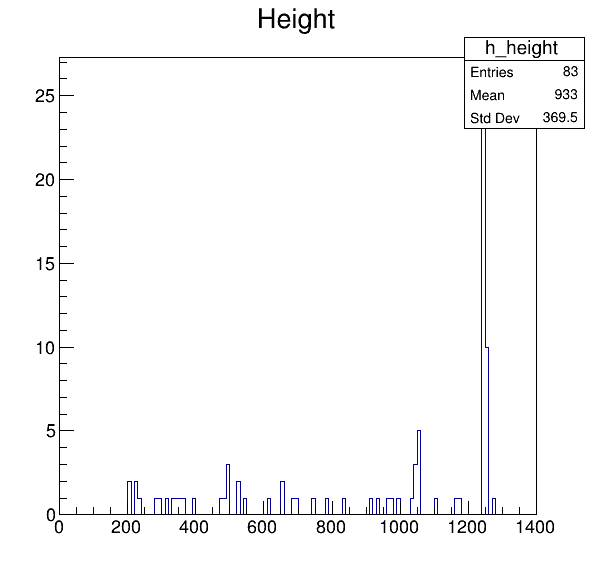

In [12]:
c1 = r.TCanvas("c1", "c1", 600, 600)
c1.cd()
h_height.Draw()
c1.Draw()


In [7]:
type(milliqanPlot)

type

In [25]:
mycuts.layerCut() in dir(milliqanCuts)

AttributeError: 'list' object has no attribute 'layer'

In [109]:
thisAreaCut

<function milliqanCuts.getLambda.<locals>.<lambda>(x)>

In [120]:
import types
types.LambdaType

function

In [123]:
thisAreaCut.__code__.co_name

'<lambda>'